<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Firstmidterm2022.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# Midterm 2

**Solution Midterm 2, Spring 2025**

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

### Part 1, The Duffing Oscillator (60pt)

Consider the following equation of motion for a damped and driven oscillator that is not necessarily linear. This is the [Duffing equation](https://en.wikipedia.org/wiki/Duffing_equation), which describes a damped driven simple harmonic oscillator with a cubic non-linearity. It's equation of motion is given by:

$$\ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = \gamma \cos(\omega t).$$

where $\alpha$, $\beta$, $\delta$, $\gamma$, and $\omega$ are constants.

Below is a figure showing the [strange attractor](https://en.wikipedia.org/wiki/Attractor#Strange_attractor) of the Duffing Oscillator over four periods. It is locally chaotic, but globally it is stable. This is a common feature of non-linear systems.

![Strange attractor](https://upload.wikimedia.org/wikipedia/commons/f/fc/Duffing_oscillator_strange_attractor_with_color.gif)

We focus on this one dimensional case, but we will analyze it in parts to put together a full picture of the dynamics of the system. If you are looking for useful parameter choices and initial conditions, we suggest using those listed on [the Wikipedia page](https://en.wikipedia.org/wiki/Duffing_equation).

Recall that the potential for this system can give rise to different kinds of behavior depending on the parameters. The figure below shows the potential for different choices of $\alpha$ and $\beta$. Make sure you choose your parameters to match the potential you want to study - pick a stable well for solving for trajectories.

![Duffing potential](../images/assignments/duffing_potential.png)

#### Undamped and undriven case (20 points)

1. (5 pt) Consider the undriven and undamped case, $\delta = \gamma = 0$. What potential would give rise to this kind of equation of motion? Demonstrate that potential gives the expected equation of motion.

```{admonition} Solution
:class: tip

We are focusing on the one-dimensional and undamped case, so we can write the equation of motion as:

$$\ddot{x} + \alpha x + \beta x^3 = 0.$$

This equation of motion is related to the spatial dependence of a potential energy. We can see this because the two terms that are not the acceleration are dependent only on position. We can write this as:


$$\ddot{x} = \dfrac{F_{x}}{m} = -\dfrac{1}{m}\dfrac{dV}{dx} = -\alpha x - \beta x^3.$$

This means that the potential energy is, up to a constant, $V(x) = \dfrac{1}{2} m\alpha x^2 + \dfrac{1}{4} m\beta x^4$. 

We can verify that this potential gives the expected equation of motion by taking the derivative of the potential with respect to $x$ and plugging it into the equation of motion. We find:

$$\dfrac{dV}{dx} = m\alpha x + m\beta x^3,$$

So that the equation of motion becomes:

$$\ddot{x} = -\dfrac{1}{m}\dfrac{dV}{dx} = -\alpha x - \beta x^3.$$

```



2. (5 pt) Find the equilibrium points of the system for the undriven and undamped case. What are the conditions for stable and unstable equilibrium points? Plot the potential for some choices of $\alpha$ and $\beta$ to illustrate your findings.

```{admonition} Solution
:class: tip

Here we can find the equilbrium points by setting the net force to zero (i.e., the derivative of the potential energy is zero). We have:

$$\dfrac{dV}{dx} = m\alpha x + m\beta x^3 = 0.$$

We can factor this to find the equilibrium points:

$$x(\alpha + \beta x^2) = 0.$$

So that there are in principle up to three equilibrium points.

$$x = 0, \quad x = \pm \sqrt{-\dfrac{\alpha}{\beta}}.$$

The stability of these points is determined by the concavity of the potential. If the potential is concave up, the equilibrium point is stable. If the potential is concave down, the equilibrium point is unstable. We can see this by looking at the second derivative of the potential:

$$\dfrac{d^2V}{dx^2} = m\alpha + 3m\beta x^2.$$

For $x=0$, we have

$$\dfrac{d^2V}{dx^2} = m\alpha,$$

and for $x = \pm \sqrt{-\dfrac{\alpha}{\beta}}$, we have

$$\dfrac{d^2V}{dx^2} = m\alpha - 3m\beta\dfrac{\alpha}{\beta} = m\alpha - 3m\alpha = -2m\alpha.$$

Note that there's a condition on the existence on two of the equilibrium points, namely that $\alpha < 0$ and $\beta > 0$ or $alpha > 0$ and $\beta < 0$. This is because the square root of a negative number is imaginary, and we need a real value for $x$.

* If $\alpha > 0$, the equilibrium point at $x = 0$ is stable. 
* If $\alpha > 0$ and $\beta < 0$, the equilibrium points at $x = \pm \sqrt{-\dfrac{\alpha}{\beta}}$ exist and are unstable. 
* If $\alpha < 0$, the equilibrium point at $x = 0$ is unstable. 
* If $\alpha < 0$ and $\beta > 0$, the equilibrium points at $x = \pm \sqrt{-\dfrac{\alpha}{\beta}}$ exist and are stable. 
 
The picture above shows the potential for different choices of $\alpha$ and $\beta$. We reproduce that figure below.

```

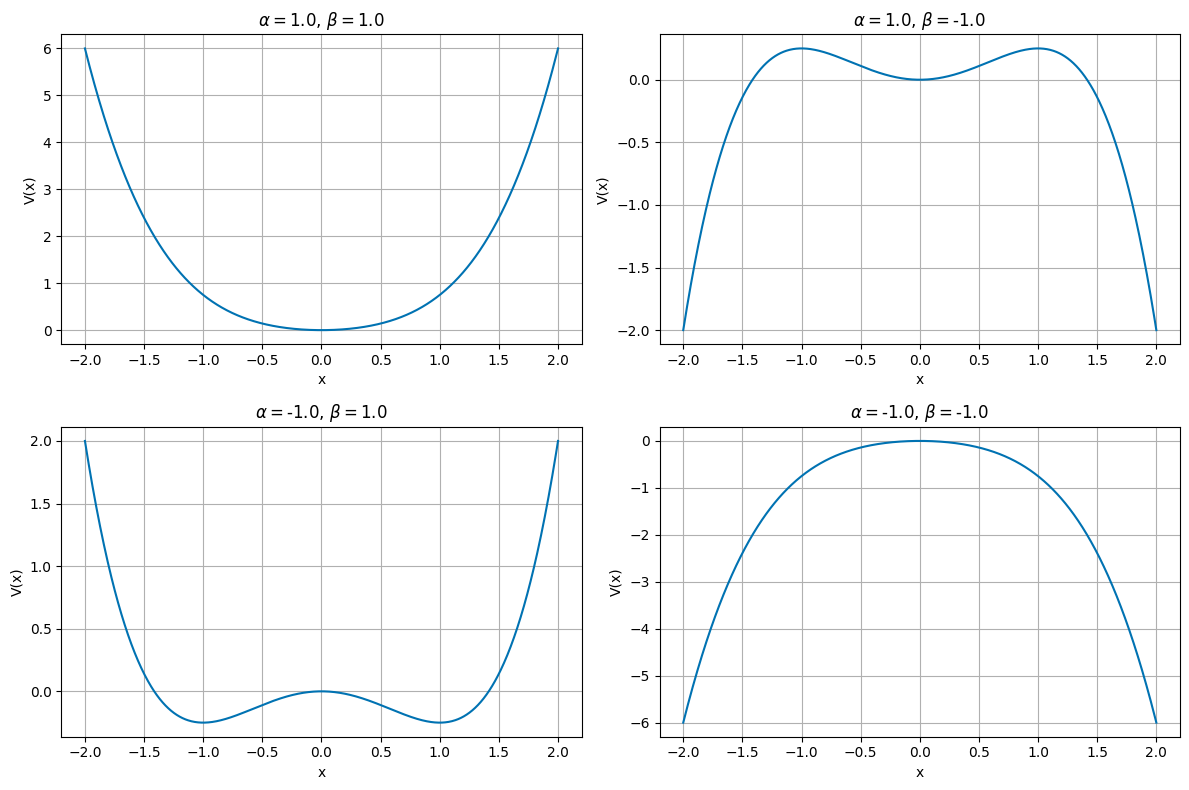

In [2]:
## Define the static Duffing Potential
def V(x, alpha, beta):
    return 0.5*alpha*x**2 + 0.25*beta*x**4

## Define a series of parameters for the potential

alpha = [1.0, 1.0, -1.0, -1.0]
beta = [1.0, -1.0, 1.0, -1.0]

## Create four plots of the potential

x = np.linspace(-2,2,1000)
plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(x,V(x,alpha[i],beta[i]))
    plt.xlabel('x')
    plt.ylabel('V(x)')
    plt.title(r'$\alpha = $' + str(alpha[i]) + r', $\beta = $' + str(beta[i]))
    plt.grid()
    
plt.tight_layout()



3. (5 pt) Plot the phase space for the undriven and undamped case. What are the trajectories of the system? What is the behavior of the system? Does it match your expectations from the potential? *The figure above only starts this discussion.*

```{admonition} Solution
:class: tip

For this we will choose the double well stable potential where $\alpha < 0$ and $\beta > 0$. We can plot the phase space by plotting the velocity as a function of position. And we do that for the choices of $\alpha = -1$ and $\beta = 1$. We plot that below (with $m =1$).

We can see that the system always exhibits oscillatory behavior. The system will somtimes oscillate between the two stable equilibrium points. For lower energy choices, it might oscillate around one or the other stable points. This is consistent with the potential we chose, which has two stable equilibrium points. 

```

In [3]:
def DuffingStatic(X,V,alpha=-1.0,beta=1.0):
    dX = V
    dV = -alpha*X - beta*X**3
    return dX, dV

def DuffingPhaseSpace(x_lim, y_lim, grid_size):
    
    x = np.linspace(-x_lim, x_lim, grid_size)
    y = np.linspace(-y_lim, y_lim, grid_size)
    
    X, Y = np.meshgrid(x, y)
    
    dX, dY = DuffingStatic(X, Y)
    
    return X, Y, dX, dY

# Generate the phase space for the Duffing Oscillator
x_lim = 2
y_lim = 2
grid_size = 20

X, Y, dX, dY = DuffingPhaseSpace(x_lim, y_lim, grid_size)

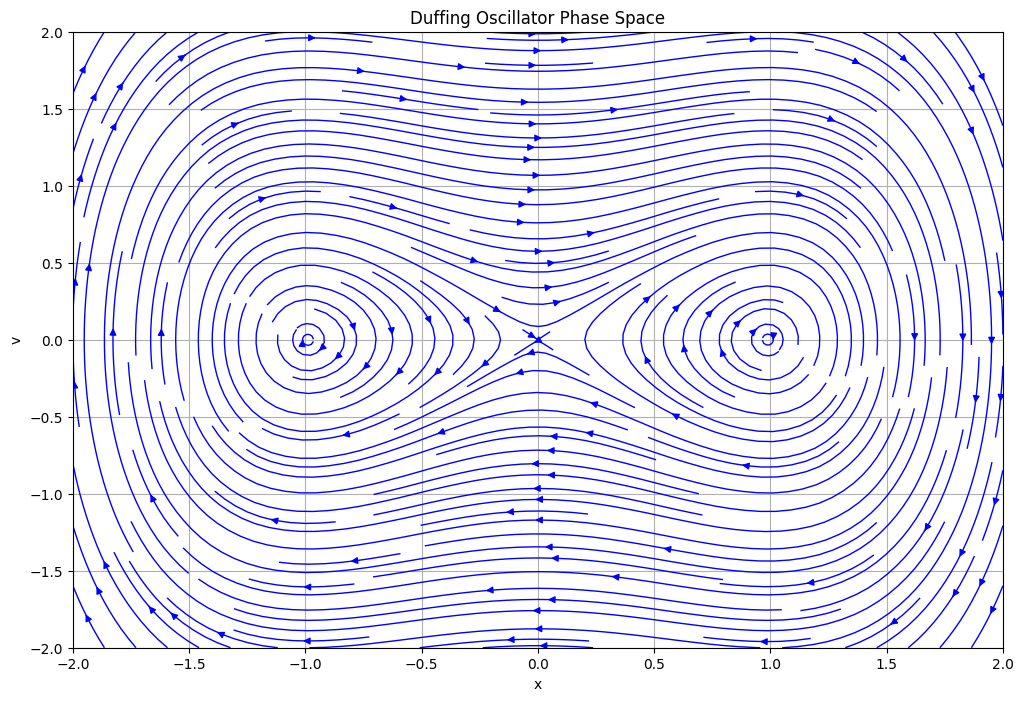

In [4]:
fig = plt.figure(figsize=(12,8))

plt.streamplot(X, Y, dX, dY, color='b', linewidth=1, density=2)
plt.xlabel('x')
plt.ylabel('v')
plt.title('Duffing Oscillator Phase Space')
plt.grid()



4. (5 pt) **Here you are likely to need a numerical solver.**  Solve the equation of motion for the undriven and undamped case for a reasonable choice of $\alpha$ and $\beta$ and initial conditions. Plot the position as a function of time. What is the behavior of the system? Does it match your expectations from the potential and the phase portrait?

```{admonition} Solution
:class: tip

We will solve the equation of motion for two cases, one where the oscillator moves between the two stable points and one where it stays near one or the other. Here it's a measure of the total energy (which is conserved) that determines the behavior of the system. We will continue to use $\alpha = -1$ and $\beta = 1$.

But we generate three scenarios. One where the total energy is high, one where the total energy is low, and one where the total energy is in between. We plot the position as a function of time for these three cases below.

* For high energy, the system oscillates between the two stable points. We choose initial conditions $x(0) = 1$ and $\dot{x}(0) = 1.5$.
* For low energy, the system oscillates around one of the stable points. We choose initial conditions $x(0) = 1.0$ and $\dot{x}(0) = 0.3$. And we choose additional initial conditions $x(0) = -1.0$ and $\dot{x}(0) = 0.3$, to see the system oscillate around the other stable point.
* For intermediate energy, the system oscillates around one of the stable points. We choose initial conditions $x(0) = 0.0$ and $\dot{x}(0) = 0.01$.

We write the code below.

These different trajectories are consistent with the potential we chose, which has two stable equilibrium points, and we can see that the system oscillates between the two stable points for high energy, and around one (or the other) of the stable points for low energy.

```

In [5]:
## Euler Cromer First Order Solver for the Duffing Oscillator

def DuffingEulerCromer(x0, v0, alpha=-1.0, beta=1.0, dt=0.001, t_max=30):
    
    t = np.arange(0, t_max, dt)
    
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    
    x[0] = x0
    v[0] = v0
    
    for i in range(1, len(t)):
        x[i] = x[i-1] + v[i-1]*dt
        v[i] = v[i-1] - (alpha*x[i-1] + beta*x[i-1]**3)*dt
        
    return t, x, v

In [6]:

## Solve the Duffing Oscillator for our set of initial conditions

## Define the initial conditions
initialPositions = [1, 1.0, -1.0, 0.0]
initialVelocities = [1.5, 0.3, 0.3, 0.01]

## Find numerical solutions for the Duffing Oscillator
## for our choices of initial conditions
## store the results in separate pandas dataframes

t, x, v = DuffingEulerCromer(initialPositions[0], initialVelocities[0])
highEnergyDF = pd.DataFrame({'t': t, 'x': x, 'v': v})

t, x, v = DuffingEulerCromer(initialPositions[1], initialVelocities[1])
lowEnergy1DF = pd.DataFrame({'t': t, 'x': x, 'v': v})

t, x, v = DuffingEulerCromer(initialPositions[2], initialVelocities[2])
lowEnergy2DF = pd.DataFrame({'t': t, 'x': x, 'v': v})

t, x, v = DuffingEulerCromer(initialPositions[3], initialVelocities[3])
medEnergyDF = pd.DataFrame({'t': t, 'x': x, 'v': v})



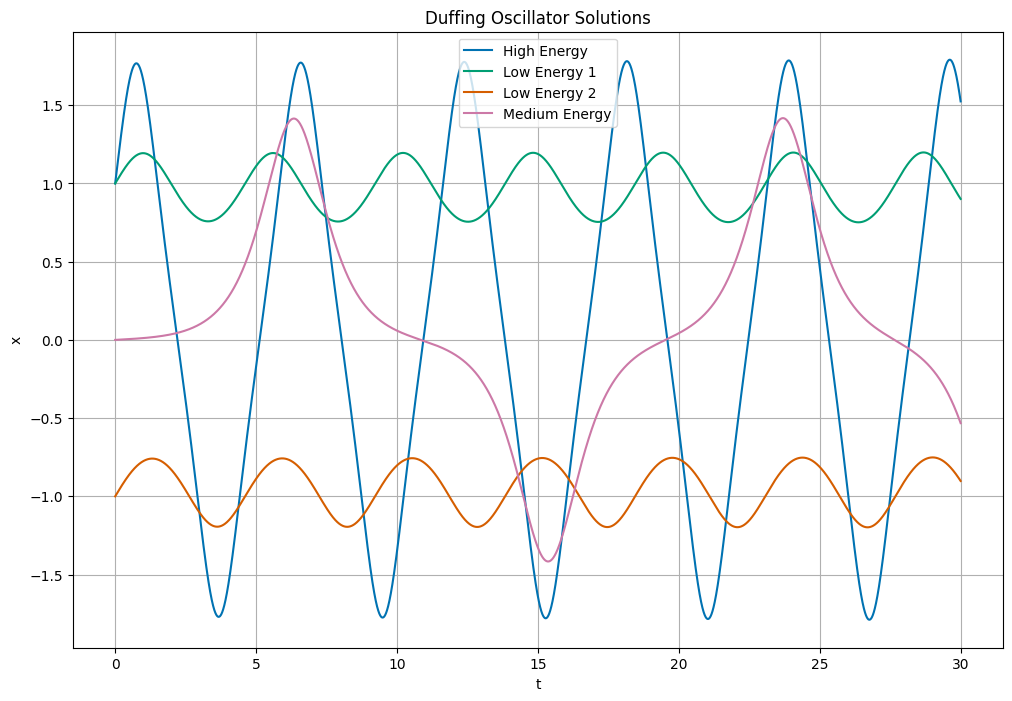

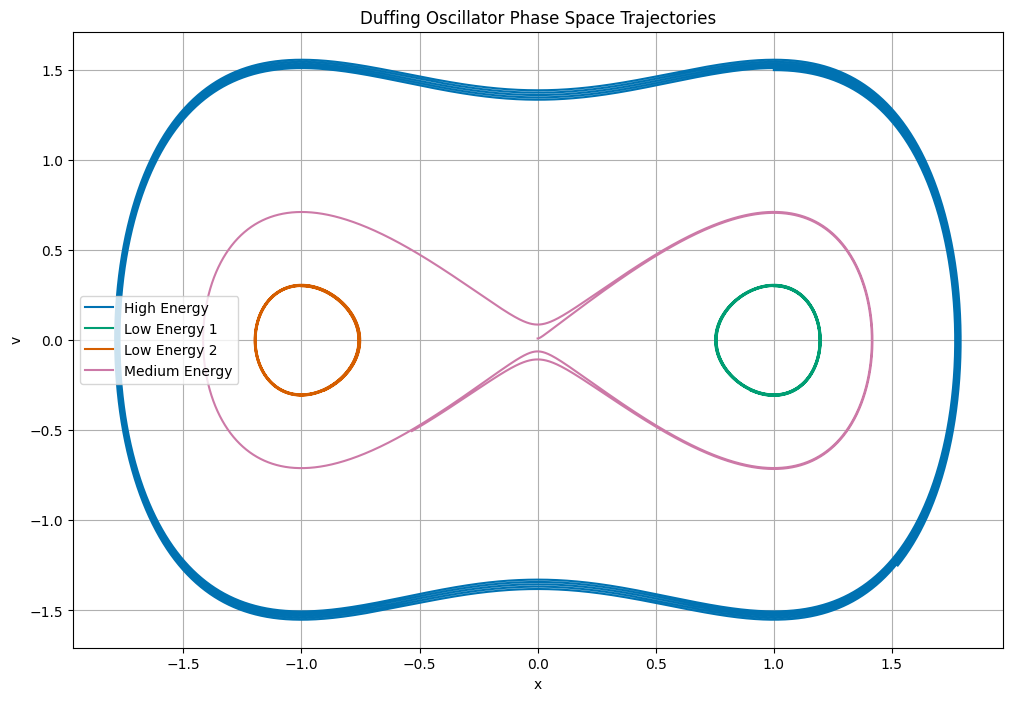

In [7]:

## Plot the numerical solutions for the Duffing Oscillator in time
fig = plt.figure(figsize=(12,8))

plt.plot(highEnergyDF['t'], highEnergyDF['x'], label='High Energy')
plt.plot(lowEnergy1DF['t'], lowEnergy1DF['x'], label='Low Energy 1')
plt.plot(lowEnergy2DF['t'], lowEnergy2DF['x'], label='Low Energy 2')
plt.plot(medEnergyDF['t'], medEnergyDF['x'], label='Medium Energy')

plt.xlabel('t')
plt.ylabel('x')
plt.title('Duffing Oscillator Solutions')
plt.grid()
plt.legend()

## Plot the numerical solutions for the Duffing Oscillator in phase space

fig = plt.figure(figsize=(12,8))

plt.plot(highEnergyDF['x'], highEnergyDF['v'], label='High Energy')
plt.plot(lowEnergy1DF['x'], lowEnergy1DF['v'], label='Low Energy 1')
plt.plot(lowEnergy2DF['x'], lowEnergy2DF['v'], label='Low Energy 2')
plt.plot(medEnergyDF['x'], medEnergyDF['v'], label='Medium Energy')

plt.xlabel('x')
plt.ylabel('v')
plt.title('Duffing Oscillator Phase Space Trajectories')
plt.grid()
plt.legend()



#### Damped and undriven case (20 points)

5. (5 pt) Now consider the damped and undriven case, $\gamma = 0$. What is the equation of motion in this case? Can you develop this equation of motion fully from a potential (like we did above)? If so, what is the potential? If not, why not?

```{admonition} Solution
:class: tip

In this case, the equation of motion is:

$$\ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = 0.$$

We are unable to write this full equation of motion as a derivative of a potential energy. This is because the damping term is a velocity dependent term, and the potential energy is only dependent on position. This system is not conservative. We are stuck with the equation of motion as it is.

```




6. (5 pt) Plot the phase space for the damped and undriven case. What kinds of trajectories are there? 

```{admonition} Solution
:class: tip

We can follow the same idea as we did for the static case and plot the phase space. This is possible, because there is no explicit time dependence in the equation of motion. We can plot the phase space for $\alpha = -1$, $\beta = 1$, and $\delta = 0.5$. We plot that below.

We see from that phase space that we should expect every trajectory to spiral inwards towards one or the other stable equilibrium point. This seems to make sense as we are shedding energy due to the damping term, so the system eventually comes to rest at one of the stable points.

```

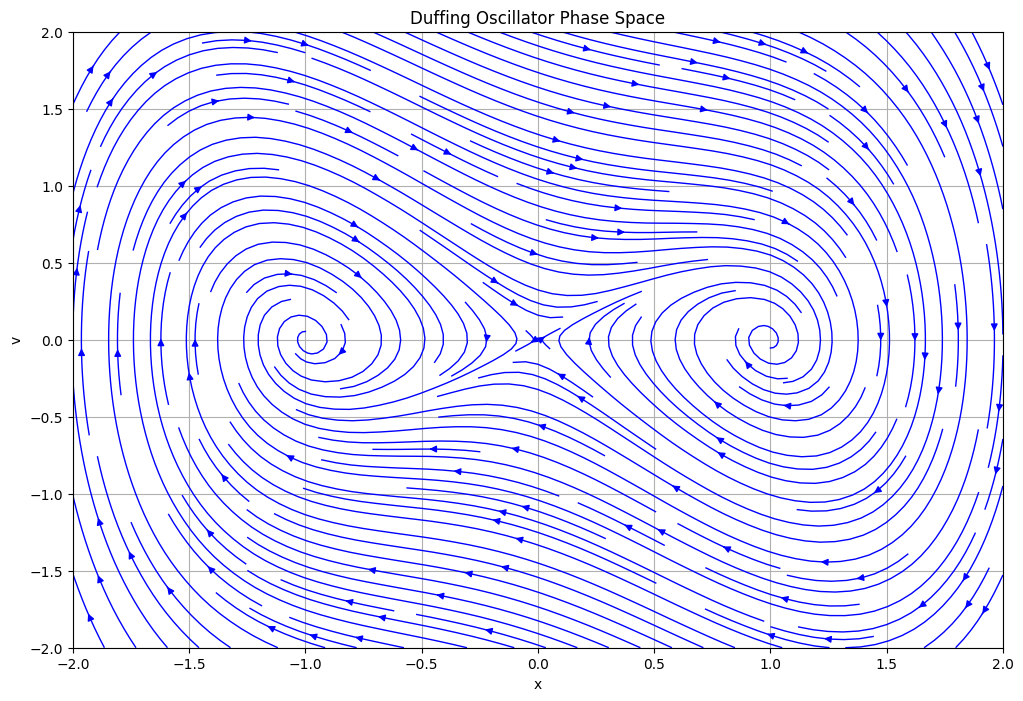

In [8]:
def DuffingDamped(X, V, alpha=-1.0, beta=1.0, gamma=0.5):
    dX = V
    dV = -alpha*X - beta*X**3 - gamma*V
    return dX, dV


def DuffingDampedPhaseSpace(x_lim, y_lim, grid_size):
    
    x = np.linspace(-x_lim, x_lim, grid_size)
    y = np.linspace(-y_lim, y_lim, grid_size)
    
    X, Y = np.meshgrid(x, y)
    
    dX, dY = DuffingDamped(X, Y)
    
    return X, Y, dX, dY

# Generate the phase space for the Duffing Oscillator
x_lim = 2
y_lim = 2
grid_size = 20

X, Y, dX, dY = DuffingDampedPhaseSpace(x_lim, y_lim, grid_size)

fig = plt.figure(figsize=(12,8))

plt.streamplot(X, Y, dX, dY, color='b', linewidth=1, density=2)
plt.xlabel('x')
plt.ylabel('v')
plt.title('Duffing Oscillator Phase Space')
plt.grid()


7. (10 pt) **Here you are likely to need a numerical solver.**  Solve the equation of motion for the damped and undriven case for a reasonable choice of $\alpha$, $\beta$, $\delta$, and initial conditions. Plot the position as a function of time. What is the behavior of the system? Does it match your expectations from the phase portrait?

```{admonition} Solution
:class: tip

We will solve the equation of motion for two cases, one where the system spirals inwards towards one of the stable points and one where the system spirals inwards towards the other stable point. We will use $\alpha = -1$, $\beta = 1$, and $\delta = 0.5$.

* For the left hand stable point, we choose initial conditions $x(0) = 0.5$ and $\dot{x}(0) = -1.5$. 
* For the right hand stable point, we choose initial conditions $x(0) = -0.5$ and $\dot{x}(0) = +1.5$. We use Euler Cromer to integrate the equations of motion and plot the position as a function of time (and their phase trajectories) for these two cases below.

In [9]:
## Euler Cromer First Order Solver for the Duffing Oscillator with damping

def DuffingDampedEulerCromer(x0, v0, alpha=-1.0, beta=1.0, gamma=0.5, dt=0.001, t_max=30):
    
    t = np.arange(0, t_max, dt)
    
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    
    x[0] = x0
    v[0] = v0
    
    for i in range(1, len(t)):
        x[i] = x[i-1] + v[i-1]*dt
        v[i] = v[i-1] - (alpha*x[i-1] + beta*x[i-1]**3 + gamma*v[i-1])*dt
        
    return t, x, v

In [10]:

## Solve the Duffing Oscillator for our set of initial conditions

## Define the initial conditions
initialPositions = [0.5, -0.5]
initialVelocities = [-1.5, 1.5]

## Find numerical solutions for the Duffing Oscillator
## for our choices of initial conditions
## store the results in separate pandas dataframes

t, x, v = DuffingDampedEulerCromer(initialPositions[0], initialVelocities[0])
leftDF = pd.DataFrame({'t': t, 'x': x, 'v': v})

t, x, v = DuffingDampedEulerCromer(initialPositions[1], initialVelocities[1])
rightDF = pd.DataFrame({'t': t, 'x': x, 'v': v})

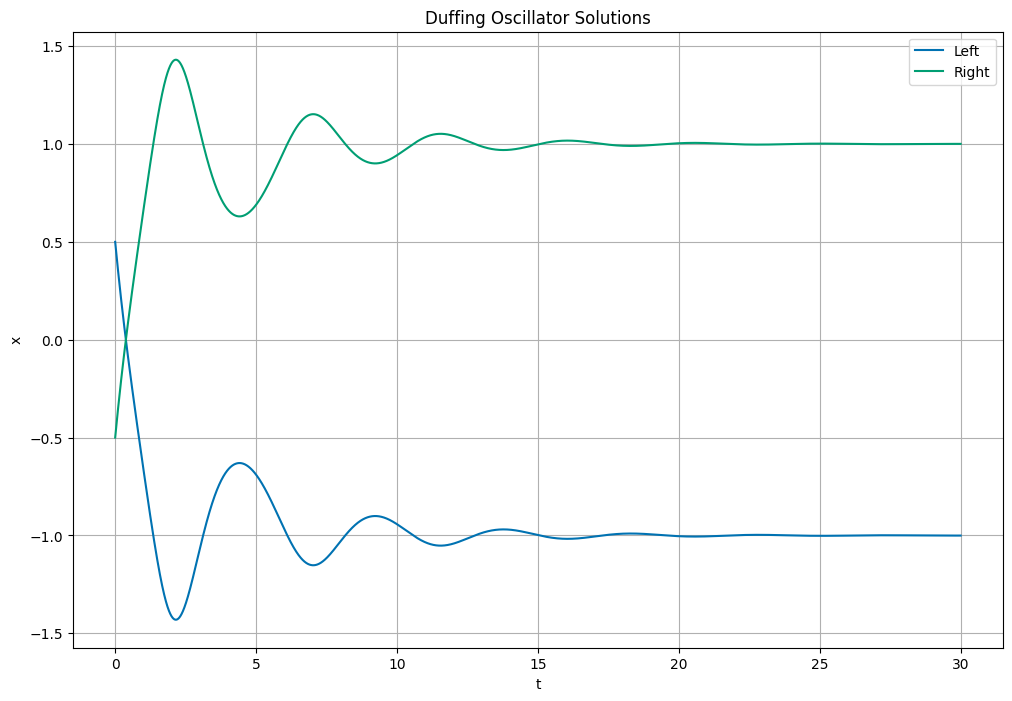

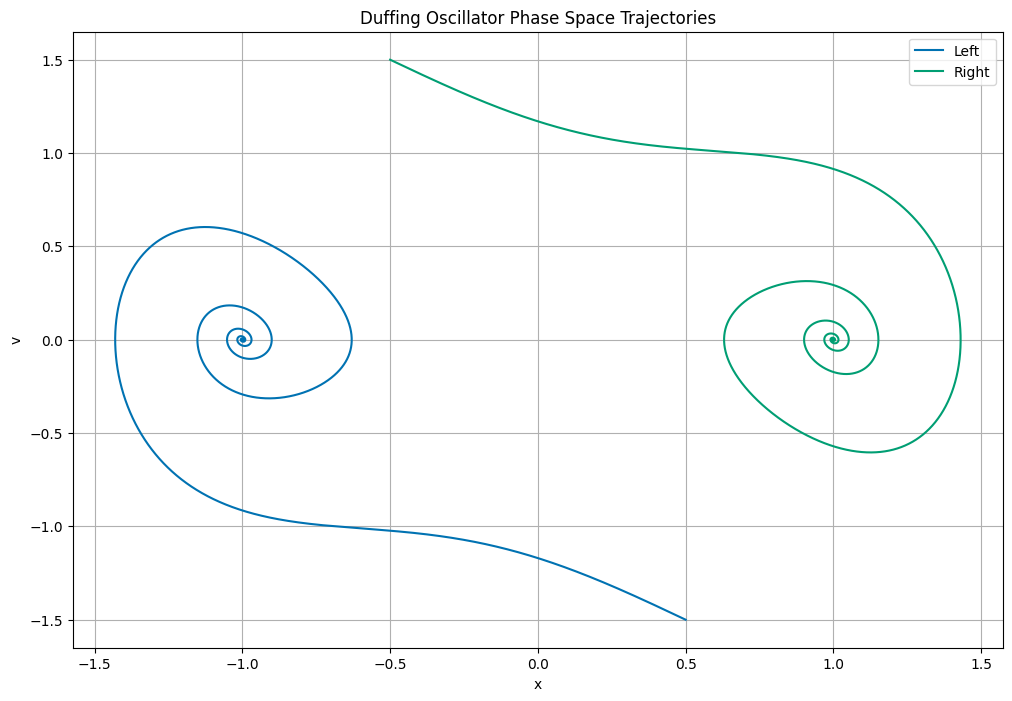

In [11]:
## Plot the numerical solutions for the Duffing Oscillator in time

fig = plt.figure(figsize=(12,8))

plt.plot(leftDF['t'], leftDF['x'], label='Left')
plt.plot(rightDF['t'], rightDF['x'], label='Right')

plt.xlabel('t')
plt.ylabel('x')
plt.title('Duffing Oscillator Solutions')
plt.grid()
plt.legend()

## Plot the numerical solutions for the Duffing Oscillator in phase space

fig = plt.figure(figsize=(12,8))

plt.plot(leftDF['x'], leftDF['v'], label='Left')
plt.plot(rightDF['x'], rightDF['v'], label='Right')

plt.xlabel('x')
plt.ylabel('v')
plt.title('Duffing Oscillator Phase Space Trajectories')
plt.grid()
plt.legend()



#### Driven and damped case (20 points)

8. (5 pt) Now consider the damped and driven case, $\gamma \neq 0$. What is the equation of motion in this case? Can you develop this equation of motion fully from a potential (like we did above)? If so, what is the potential? If not, why not?

```{admonition} Solution
:class: tip

Again, we are unable to write this full equation of motion as a derivative of a potential energy. This is because the driving term is time dependent, and the potential energy is only dependent on position. This system is not conservative. We are stuck with the equation of motion as it is.

We can write it as:

$$\ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = \gamma \cos(\omega t).$$

```




9. (5 pt) Is it possible to plot the phase space for the driven and damped case? Why or why not? What solutions are available to you to understand the behavior of the system in phase space? *Here we are not looking for you to solve the problem, but to conduct research into how people make sense of the behavior of driven and damped systems.*

```{admonition} Solution
:class: tip

It is not possible to plot the phase space for the driven and damped case. This is because the driving term is time dependent, and the phase space is a plot of position versus velocity, but it assumes the phase space is time independent. This is where the Poincaré section comes in. The Poincaré section is a plot of position versus velocity at a fixed time interval. This allows us to see the behavior of the system in phase space, even though the system is time dependent.

```



10. (10 pt) **Here you are likely to need a numerical solver.**  Solve the equation of motion for the driven and damped case for a reasonable choice of $\alpha$, $\beta$, $\delta$, $\gamma$, $\omega$, and initial conditions. Plot the position as a function of time. What is the behavior of the system? 

```{admonition} Solution
:class: tip

We will solve the equation of motion for the driven and damped case. We will use $\alpha = -1$, $\beta = 1$, $\delta = 0.5$, $\gamma = 1.0$, and $\omega = 2\pi$. We will choose the same initial conditions as before for the initially observed left and right stable points. We use Euler Cromer to integrate the equations of motion and plot the position as a function of time for this case below.

The behavior is very complicated, but we can see that the motion is bounded. This is because the system forced and damped. The combination we chose keeps the system from going off to infinity. The system with our chosen parameters appears chaotic, but it seems globally stable (i.e., bounded to a region of space). 
```

In [12]:
## Euler Cromer First Order Solver for the Duffing Oscillator with damping and oscillating force
def DuffingDampedForcedEulerCromer(x0, v0, alpha=-1.0, beta=1.0, delta=0.5, gamma=1.0, omega=1.0, dt=0.001, t_max=10):
    t = np.arange(0, t_max, dt)
    
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    
    x[0] = x0
    v[0] = v0
    
    for i in range(1, len(t)):
        x[i] = x[i-1] + v[i-1]*dt
        v[i] = v[i-1] - (alpha*x[i-1] + beta*x[i-1]**3 + delta*v[i-1] + gamma*cos(omega*t[i-1]))*dt
        
    return t, x, v

In [ ]:

## Solve the Duffing Oscillator for our set of initial conditions

## Define the initial conditions
initialPositions = [0.5, -0.5]
initialVelocities = [-1.5, 1.5]
omega = 2*np.pi
T = 2*np.pi/omega
tmax = 30*T
dt = T/10000

## Find numerical solutions for the Duffing Oscillator
## for our choices of initial conditions
## store the results in separate pandas dataframes

t, x, v = DuffingDampedForcedEulerCromer(initialPositions[0], initialVelocities[0], omega=omega, dt=dt, t_max=tmax)
leftDF = pd.DataFrame({'t': t, 'x': x, 'v': v})

t, x, v = DuffingDampedForcedEulerCromer(initialPositions[1], initialVelocities[1], omega=omega, dt=dt, t_max=tmax)
rightDF = pd.DataFrame({'t': t, 'x': x, 'v': v})

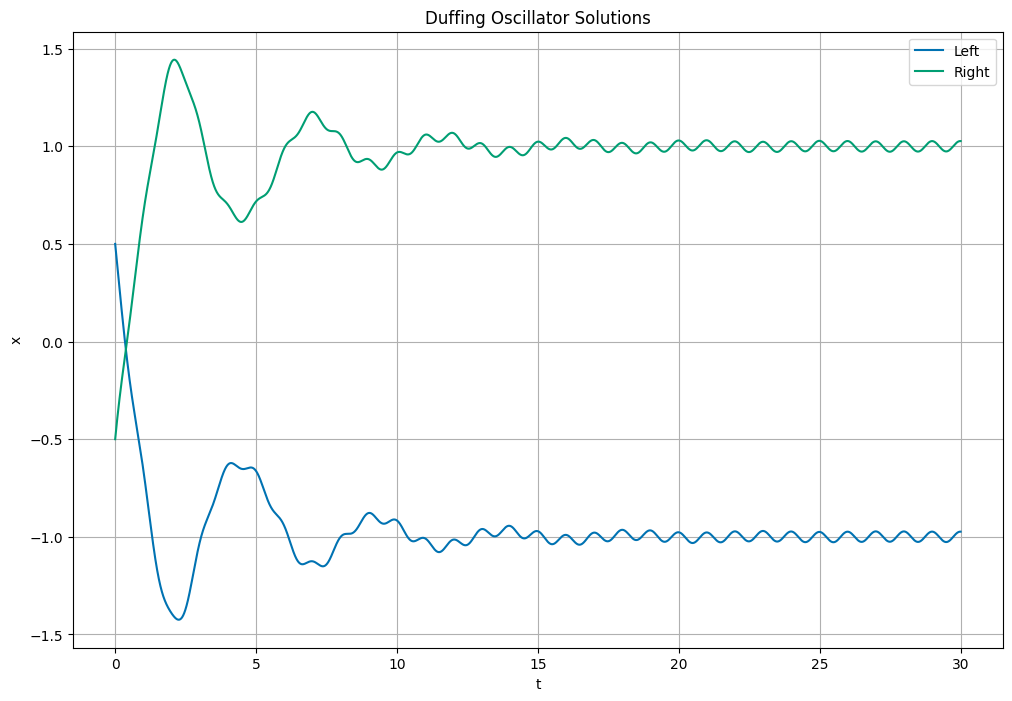

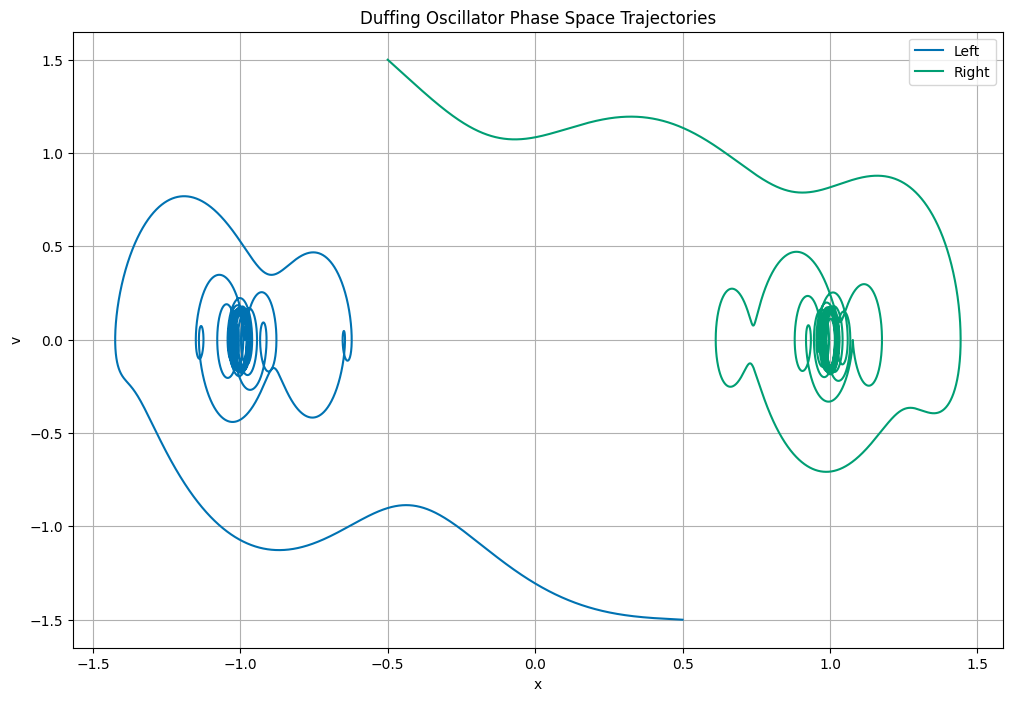

In [14]:
## Plot the numerical solutions for the Duffing Oscillator in time

fig = plt.figure(figsize=(12,8))

plt.plot(leftDF['t'], leftDF['x'], label='Left')
plt.plot(rightDF['t'], rightDF['x'], label='Right')

plt.xlabel('t')
plt.ylabel('x')
plt.title('Duffing Oscillator Solutions')
plt.grid()
plt.legend()

## Plot the numerical solutions for the Duffing Oscillator in phase space

fig = plt.figure(figsize=(12,8))

plt.plot(leftDF['x'], leftDF['v'], label='Left')
plt.plot(rightDF['x'], rightDF['v'], label='Right')

plt.xlabel('x')
plt.ylabel('v')
plt.title('Duffing Oscillator Phase Space Trajectories')
plt.grid()
plt.legend()




#### Extra credit (up to 30 points)

11. (10 pts) The Duffing oscillator can be either a soft or hard spring by changing the sign of the $\alpha$ term. What happens to the behavior of the system when you change the sign of $\alpha$? Can you explain this behavior in terms of the potential?

```{admonition} Solution
:class: tip

In all of our choices, we selected $\alpha < 0$. This means that the potential is a double well potential. If we change the sign of $\alpha$, the potential becomes a single well potential. This means that the system will always oscillate around the single stable equilibrium point. We can see this in the phase space plot we made below. It looks similar to the regular damped simple harmonic oscillator.


Let's drive it as before with $\gamma = 0.5$ and $\omega = 1$. We will use $\alpha = 1$, $\beta = 1$, $\delta = 0.5$, and the same initial conditions as before. We use Euler Cromer to integrate the equations of motion and plot the position as a function of time for this case below. And it really does look like a damped simple harmonic oscillator.
```

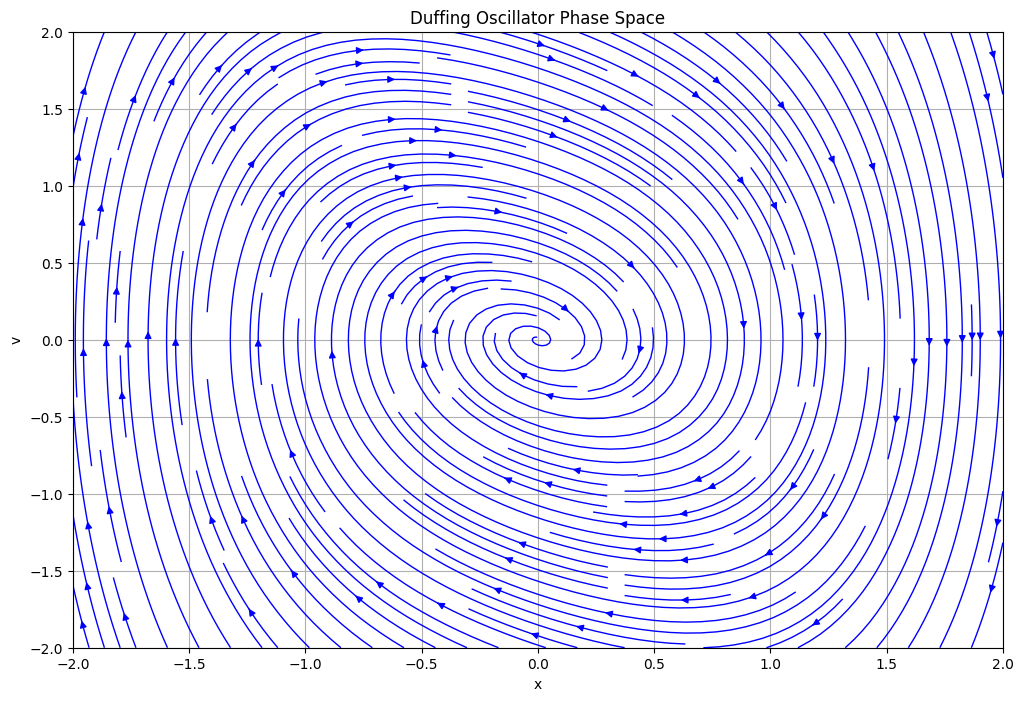

In [15]:
def DuffingDampedPhaseSpace(x_lim, y_lim, grid_size):
    
    x = np.linspace(-x_lim, x_lim, grid_size)
    y = np.linspace(-y_lim, y_lim, grid_size)
    
    X, Y = np.meshgrid(x, y)
    
    dX, dY = DuffingDamped(X, Y, alpha=1.0)
    
    return X, Y, dX, dY

# Generate the phase space for the Duffing Oscillator
x_lim = 2
y_lim = 2
grid_size = 20

X, Y, dX, dY = DuffingDampedPhaseSpace(x_lim, y_lim, grid_size)

fig = plt.figure(figsize=(12,8))

plt.streamplot(X, Y, dX, dY, color='b', linewidth=1, density=2)
plt.xlabel('x')
plt.ylabel('v')
plt.title('Duffing Oscillator Phase Space')
plt.grid()

In [ ]:

## Solve the Duffing Oscillator for our set of initial conditions

## Define the initial conditions
initialPositions = [0.5, -0.5]
initialVelocities = [-1.5, 1.5]
omega = 2*np.pi
T = 2*np.pi/omega
tmax = 30*T
dt = T/10000



## Find numerical solutions for the Duffing Oscillator
## for our choices of initial conditions
## store the results in separate pandas dataframes

t, x, v = DuffingDampedForcedEulerCromer(initialPositions[0], initialVelocities[0], alpha=1.0, omega=omega, dt=dt, t_max=tmax)
leftDF = pd.DataFrame({'t': t, 'x': x, 'v': v})

t, x, v = DuffingDampedForcedEulerCromer(initialPositions[1], initialVelocities[1], alpha = 1.0, omega=omega, dt=dt, t_max=tmax)
rightDF = pd.DataFrame({'t': t, 'x': x, 'v': v})

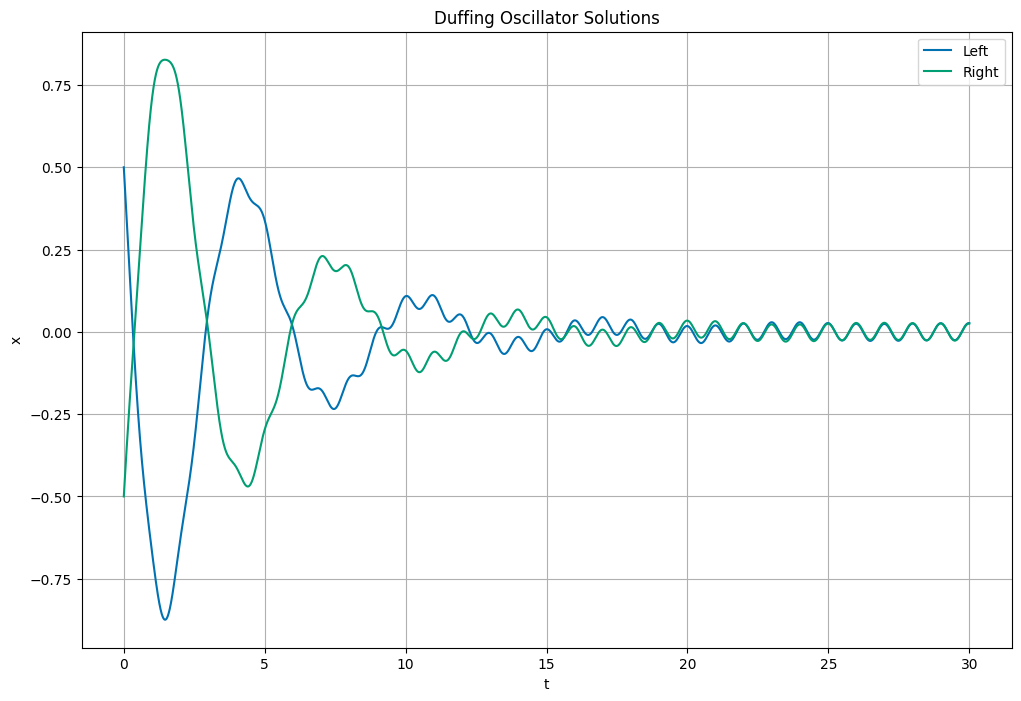

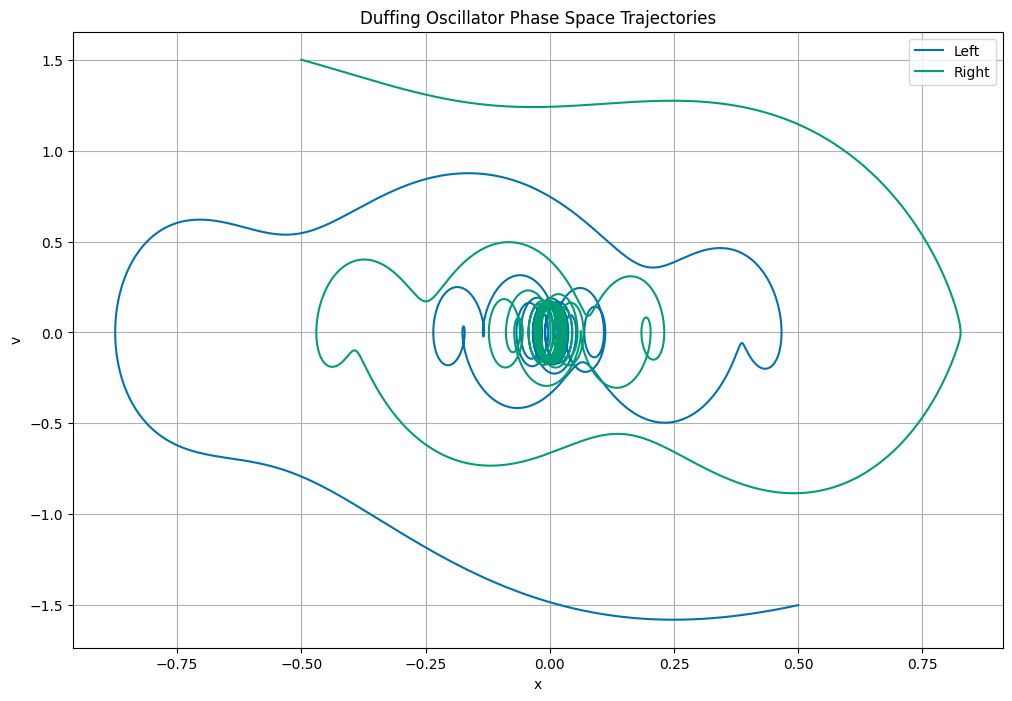

In [17]:
## Plot the numerical solutions for the Duffing Oscillator in time

fig = plt.figure(figsize=(12,8))

plt.plot(leftDF['t'], leftDF['x'], label='Left')
plt.plot(rightDF['t'], rightDF['x'], label='Right')

plt.xlabel('t')
plt.ylabel('x')
plt.title('Duffing Oscillator Solutions')
plt.grid()
plt.legend()

## Plot the numerical solutions for the Duffing Oscillator in phase space

fig = plt.figure(figsize=(12,8))

plt.plot(leftDF['x'], leftDF['v'], label='Left')
plt.plot(rightDF['x'], rightDF['v'], label='Right')

plt.xlabel('x')
plt.ylabel('v')
plt.title('Duffing Oscillator Phase Space Trajectories')
plt.grid()
plt.legend()


12. (20 pts) A critical tool for understanding the behavior of the Duffing oscillator is the [Poincaré section](https://en.wikipedia.org/wiki/Poincar%C3%A9_map). Can you implement a Poincaré section for the driven and damped case? What does it tell you about the behavior of the system?

```{admonition} Solution
:class: tip

In an analysis where we want to use Poincare sections, we need to keep track of the location and velocity at a fixed time interval. We can do this by integrating the equations of motion and then plotting the position and velocity at a fixed time interval. This allows us to see the behavior of the system in phase space, even though the system is time dependent. It's common to choose the period of the driving force as the time interval. We set that up below.

```

***This code is not working; I think the integrator is improperly set up. I will fix it using solve_ivp later.***

0.0031415926535897933


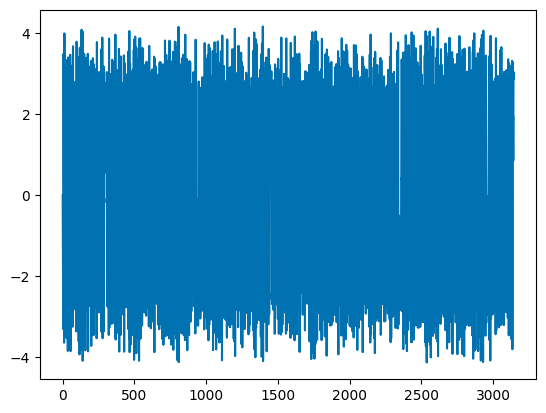

In [62]:
## Solve the Duffing Oscillator for our set of initial conditions

## Define the initial conditions
initialPos = 0
initialVel = 0
omega = 2
T = 2*np.pi/omega
tmax = 1000*T
dt = T/1000

print(dt)

## Parameters for the Duffing Oscillator
alpha=-1.0
beta=0.25
delta=0.1
gamma=2.5

## Find numerical solutions for the Duffing Oscillator
## for our choices of initial conditions
## store the results in separate pandas dataframes

t, x, v = DuffingDampedForcedEulerCromer(initialPos, initialVel, alpha=alpha, beta=beta, delta=delta, gamma=gamma, omega=omega, dt=dt, t_max=tmax)
trajDF = pd.DataFrame({'t': t, 'x': x, 'v': v})

plt.plot(t,x)

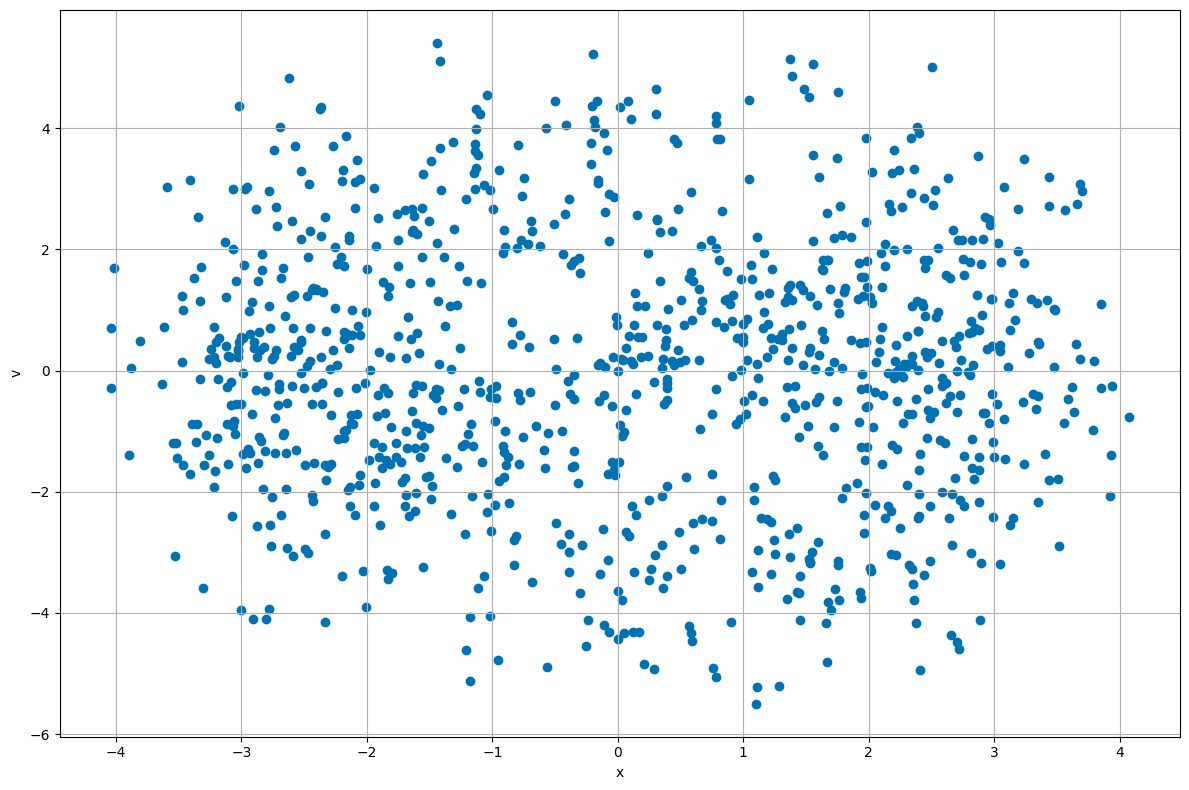

In [63]:
## Extract the position and velocity data for the left and right solutions
## at regular time intervals associated with the period of the driving force
## With omega = 2*pi, the period is 1, we want to sample every 1/T.

trajDF_sampled = trajDF.iloc[::int(T/dt)]

## Plot the numerical solutions for the Duffing Oscillator in phase space
## with the solutions sampled at regular intervals

fig, ax = plt.subplots(figsize=(12, 8))

# Main plot
ax.scatter(trajDF_sampled['x'], trajDF_sampled['v'], marker='o')
ax.set_xlabel('x')
ax.set_ylabel('v')
ax.grid(True)

plt.tight_layout()

### Part 2, Strange Attractor (40pt)

We learned about [Strange Attractors](https://en.wikipedia.org/wiki/Attractor#Strange_attractor) when modeling the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system) in class. In this part of the exam, we will explore the [Chen system](https://www.dynamicmath.xyz/calculus/velfields/Chen/), which is another example of a system that exhibits chaotic behavior and has a strange attractor. The Chen system is given by the following set of ordinary differential equations:

$$\begin{align}
\dot{x} &= \alpha x-yz,\\
\dot{y} &= \beta y + xz,\\
\dot{z} &= \delta z + xy/3,\\
\end{align}$$

where $\alpha$, $\beta$, and $\delta$ are constants that determine the behavior of the system. For this problem, we will use the following values:

| Parameter | Value |
| --------- | ----- |
| $\alpha$  | 5.0   |
| $\beta$   | -10.0 |
| $\delta$  | -0.38 |

1. (10 pts) For this choice of parameters, numerically integrate (using ```solve_ivp``` or a similar integrator) the Chen system over a reasonable time interval (e.g., 100 time units). **Recall that for `solve_ivp`, you need to specify the time span and initial conditions.** For the initial conditions, you can choose $x(0) = y(0) = z(0) = 1.0$. Integrate for at least 100 time units. This will give you a starting point to observe the chaotic behavior of the system. 
```


In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

def chen(t, yy, alpha=5.0, beta=-10.0, delta=-0.38):
    x, y, z = yy
    dxdt = alpha*x-y*z
    dydt = beta*y + x*z
    dzdt = delta*z + x*y/3
    return np.array([dxdt, dydt, dzdt])

# Parameters
alpha = 5.0
beta = -10.0
delta = -0.38

# Time parameters
t_span = (0, 100)   # Time span for the simulation
t_eval = np.linspace(t_span[0], t_span[1], 10000)  

# Initial conditions
yy0 = np.array([1.0, 1.0, 1.0])  # Initial conditions for x, y, z

solution = solve_ivp(chen, t_span, yy0, args=(alpha, beta, delta), t_eval=t_eval, method='RK45')

2.  (10 pts) Plot the system in 3D **and** in 3 subplots showing the projection of the trajectory in the $x-y$, $x-z$, and $y-z$ planes.

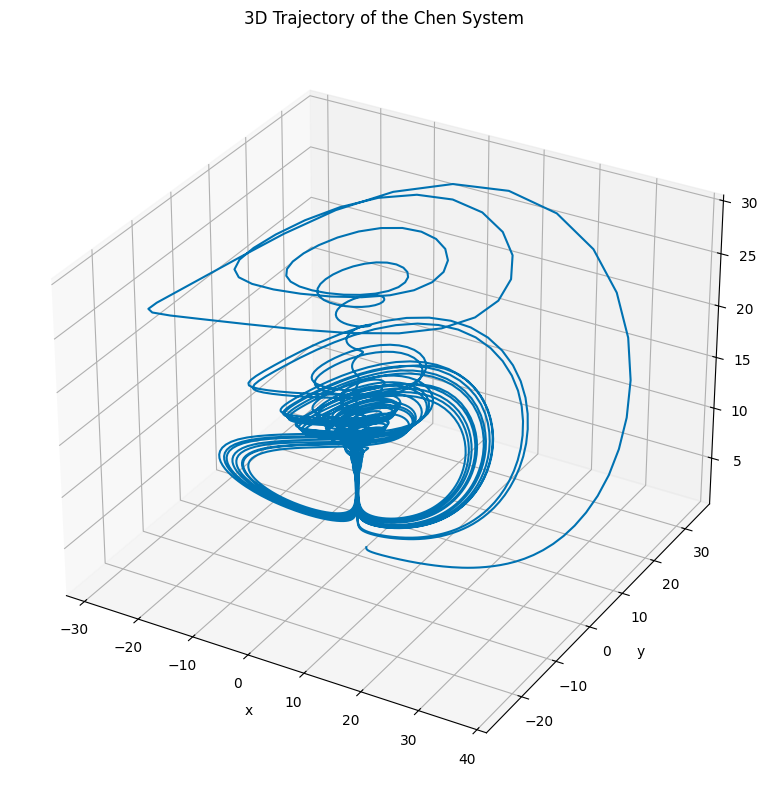

In [20]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')
from mpl_toolkits.mplot3d import Axes3D

x = solution.y[0] 
y = solution.y[1]
z = solution.y[2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='C0')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Trajectory of the Chen System')
ax.grid(True)
plt.tight_layout()
plt.show()

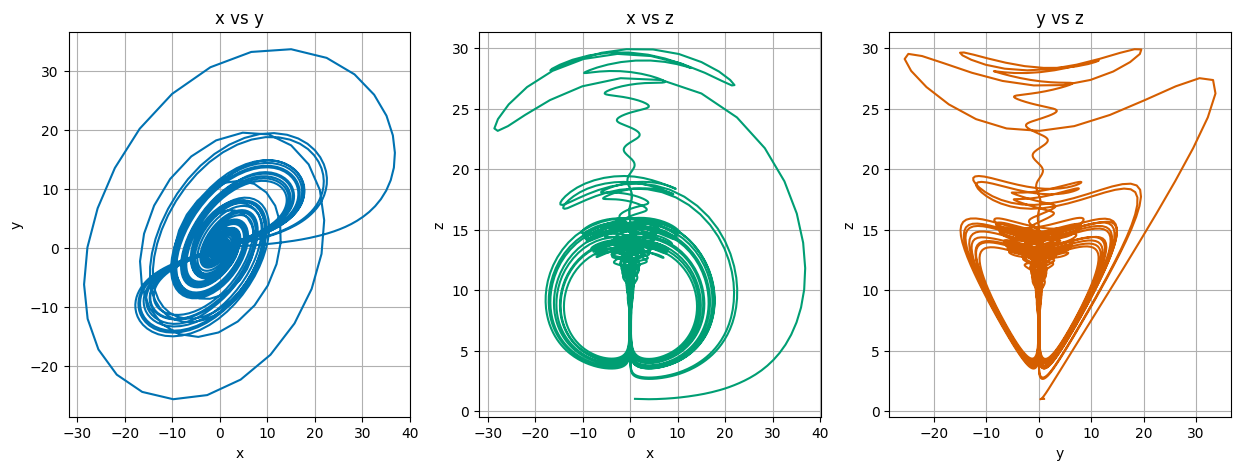

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

t = solution.t
x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

fig = plt.figure(figsize=(15, 5))
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 3, figure=fig)

# First subplot: x vs y
ax1 = fig.add_subplot(gs[0])
ax1.plot(x, y, color='C0')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('x vs y')
ax1.grid(True)

# Second subplot: x vs z
ax2 = fig.add_subplot(gs[1])
ax2.plot(x, z, color='C1')
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('x vs z')
ax2.grid(True)

# Third subplot: y vs z
ax3 = fig.add_subplot(gs[2])
ax3.plot(y, z, color='C2')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('y vs z')
ax3.grid(True)

3. (10 pts) For two nearby points in phase space, numerically integrate the Chen system for 100 time units. Use the same initial conditions as before, but slightly perturb one of the points (e.g., $x(0) = 1.0$, $y(0) = 1.0$, $z(0) = 1.0$ for the first point and $x(0) = 1.01$, $y(0) = 1.0$, $z(0) = 1.0$ for the second point). Plot both trajectories in 3D to observe how they diverge over time. How can you tell that the system is chaotic from this behavior? What features of the trajectories indicate chaotic behavior? 

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

def chen(t, yy, alpha=5.0, beta=-10.0, delta=-0.38):
    x, y, z = yy
    dxdt = alpha*x-y*z
    dydt = beta*y + x*z
    dzdt = delta*z + x*y/3
    return np.array([dxdt, dydt, dzdt])

alpha = 5.0
beta = -10.0
delta = -0.38

t_span = (0, 1000)  
t_eval = np.linspace(t_span[0], t_span[1], 100000)  

yy1 = np.array([1.0, 1.0, 1.0])  # Initial conditions for x, y, z
yy2 = np.array([1.01, 1.0, 1.0])  # Slightly perturbed initial conditions

solution1 = solve_ivp(chen, t_span, yy1, args=(alpha, beta, delta), t_eval=t_eval, method='RK45')
solution2 = solve_ivp(chen, t_span, yy2, args=(alpha, beta, delta), t_eval=t_eval, method='RK45')

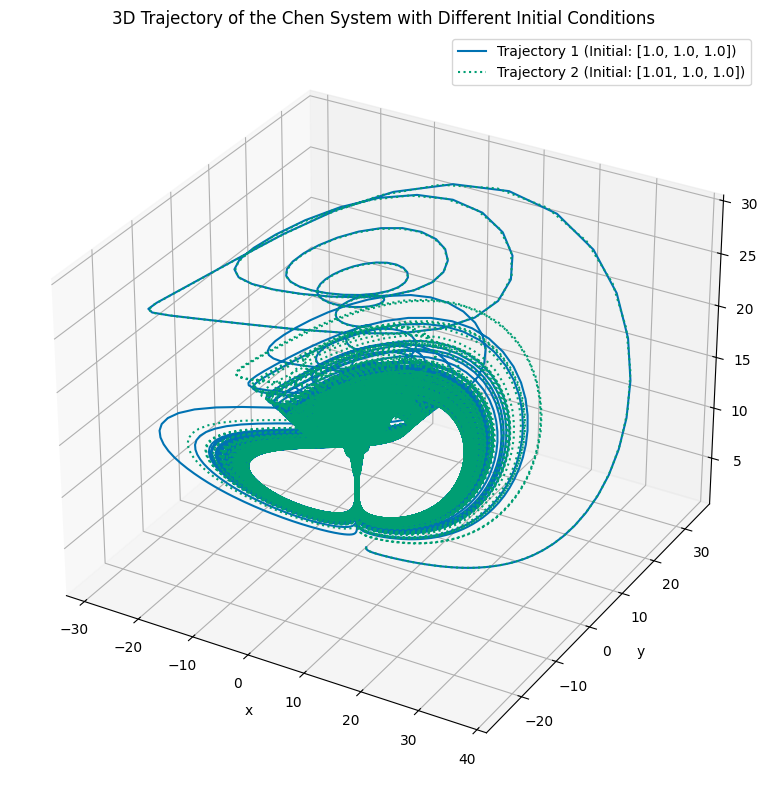

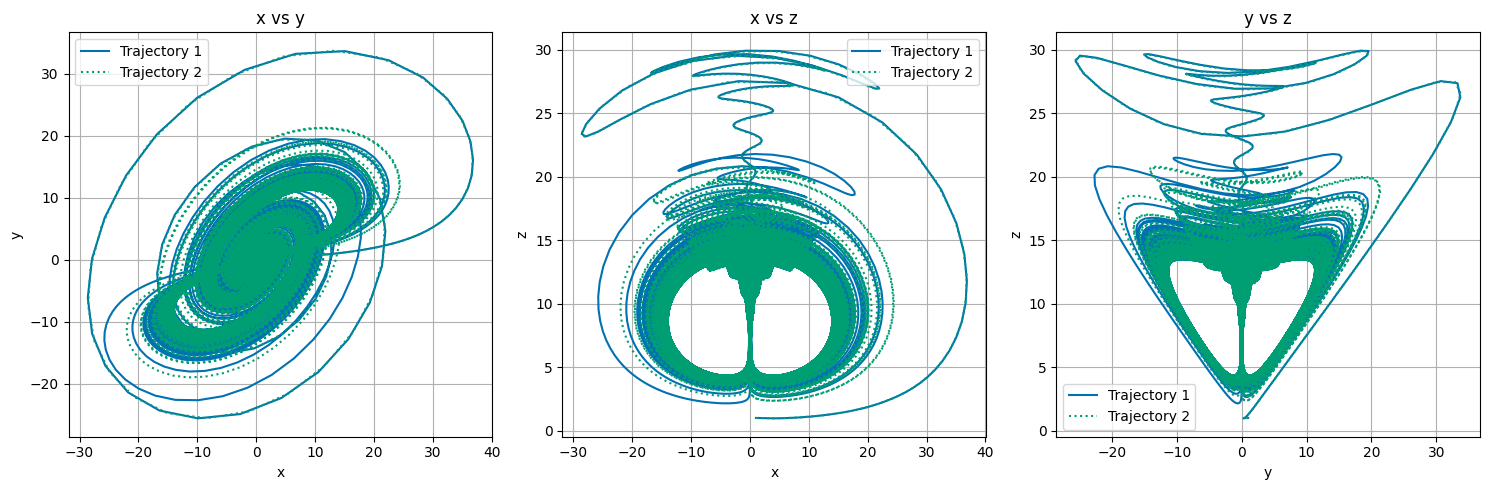

In [23]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-v0_8-colorblind')

t1 = solution1.t
t2 = solution2.t
x1 = solution1.y[0]
y1 = solution1.y[1]
z1 = solution1.y[2]
x2 = solution2.y[0]
y2 = solution2.y[1]
z2 = solution2.y[2]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1, y1, z1, color='C0', label='Trajectory 1 (Initial: [1.0, 1.0, 1.0])')
ax.plot(x2, y2, z2, color='C1', linestyle=':', label='Trajectory 2 (Initial: [1.01, 1.0, 1.0])')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Trajectory of the Chen System with Different Initial Conditions')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Plotting the results for both trajectories
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3, figure=fig)

# First subplot: x vs y for both trajectories
ax1 = fig.add_subplot(gs[0])
ax1.plot(x1, y1, color='C0', label='Trajectory 1')
ax1.plot(x2, y2, color='C1', label='Trajectory 2', linestyle=':')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('x vs y')
ax1.grid(True)
ax1.legend()

# Second subplot: x vs z for both trajectories
ax2 = fig.add_subplot(gs[1])
ax2.plot(x1, z1, color='C0', label='Trajectory 1')
ax2.plot(x2, z2, color='C1', label='Trajectory 2', linestyle=':')
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('x vs z')
ax2.grid(True)
ax2.legend()

# Third subplot: y vs z for both trajectories
ax3 = fig.add_subplot(gs[2])
ax3.plot(y1, z1, color='C0', label='Trajectory 1')
ax3.plot(y2, z2, color='C1', label='Trajectory 2', linestyle=':')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('y vs z')
ax3.grid(True)
ax3.legend()
plt.tight_layout()
plt.show()

4. (10 pts) The Chen system has two attractors that we can observe. Which attractor we end up on depends on the initial conditions. To illustrate this, numerically integrate the Chen system for 100 time units with two different sets of initial conditions. For example, you can use $x(0) = y(0) = z(0) = 1.0$ for the first trajectory and $x(0) = y(0) = z(0) = -1.0$ for the second trajectory. Plot both trajectories in 3D and in 3 projections ($x-y$, $x-z$, and $y-z$) to observe the different attractors that the system can exhibit. How can you tell that the system is chaotic from this behavior? What features of the trajectories indicate chaotic behavior? 

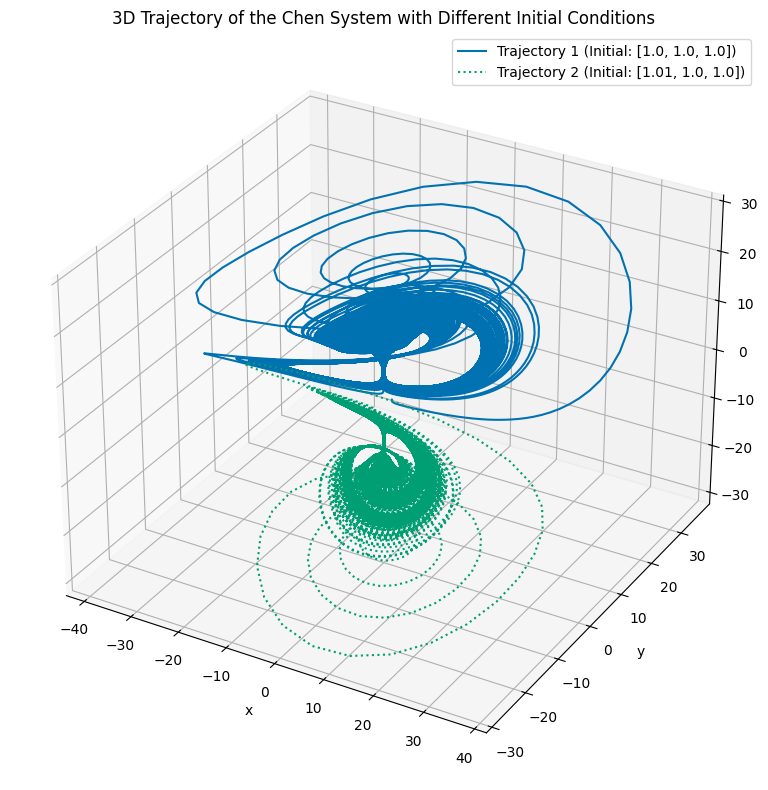

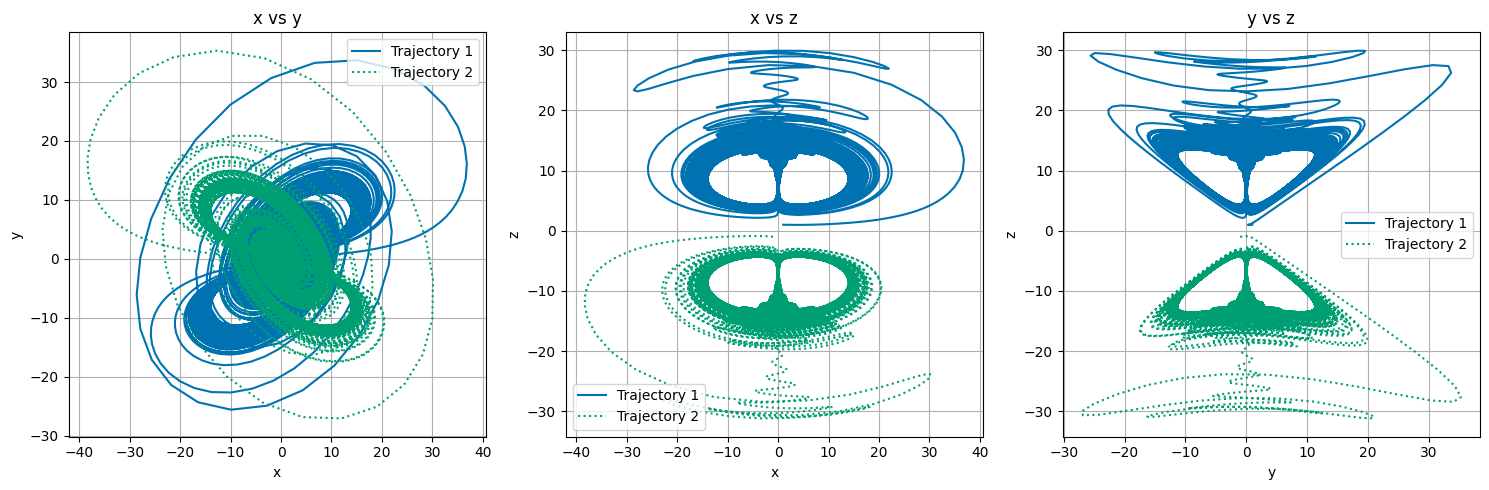

In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

def chen(t, yy, alpha=5.0, beta=-10.0, delta=-0.38):
    x, y, z = yy
    dxdt = alpha*x-y*z
    dydt = beta*y + x*z
    dzdt = delta*z + x*y/3
    return np.array([dxdt, dydt, dzdt])

alpha = 5.0
beta = -10.0
delta = -0.38

t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 100000)  

yy1 = np.array([1.0, 1.0, 1.0])  
yy2 = np.array([-1.0, -1.0, -1.0])  

solution1 = solve_ivp(chen, t_span, yy1, args=(alpha, beta, delta), t_eval=t_eval, method='RK45')
solution2 = solve_ivp(chen, t_span, yy2, args=(alpha, beta, delta), t_eval=t_eval, method='RK45')

t1 = solution1.t
t2 = solution2.t
x1 = solution1.y[0]
y1 = solution1.y[1]
z1 = solution1.y[2]
x2 = solution2.y[0]
y2 = solution2.y[1]
z2 = solution2.y[2]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1, y1, z1, color='C0', label='Trajectory 1 (Initial: [1.0, 1.0, 1.0])')
ax.plot(x2, y2, z2, color='C1', linestyle=':', label='Trajectory 2 (Initial: [1.01, 1.0, 1.0])')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Trajectory of the Chen System with Different Initial Conditions')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Plotting the results for both trajectories
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3, figure=fig)

# First subplot: x vs y for both trajectories
ax1 = fig.add_subplot(gs[0])
ax1.plot(x1, y1, color='C0', label='Trajectory 1')
ax1.plot(x2, y2, color='C1', label='Trajectory 2', linestyle=':')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('x vs y')
ax1.grid(True)
ax1.legend()

# Second subplot: x vs z for both trajectories
ax2 = fig.add_subplot(gs[1])
ax2.plot(x1, z1, color='C0', label='Trajectory 1')
ax2.plot(x2, z2, color='C1', label='Trajectory 2', linestyle=':')
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('x vs z')
ax2.grid(True)
ax2.legend()

# Third subplot: y vs z for both trajectories
ax3 = fig.add_subplot(gs[2])
ax3.plot(y1, z1, color='C0', label='Trajectory 1')
ax3.plot(y2, z2, color='C1', label='Trajectory 2', linestyle=':')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('y vs z')
ax3.grid(True)
ax3.legend()
plt.tight_layout()
plt.show()

**Extra Credit**

5. (20 pts) For the Chen system integrate a bundle of trajectories ($N>100$) with slightly different initial conditions. Make sure that your conditions are such that you cover both attractors. Plot the starting and ending points of the trajectories in 3D and in 3 projections ($x-y$, $x-z$, and $y-z$). How can you tell that the system is chaotic from this behavior? What features of the trajectories indicate chaotic behavior? 

In [25]:
def bundleOfTrajectories(initial_conditions, t_span=(0, 100), t_eval_steps=10000, alpha=5.0, beta=-10.0, delta=-0.38):
    """
    Simulate multiple trajectories of the Chen system with different initial conditions.
    Return only the starting and ending points of each trajectory.

    Parameters:
    - initial_conditions: list of tuples (x0, y0, z0) for initial conditions
    - t_span: time span for the simulation
    - t_eval_steps: number of steps for time evaluation
    - alpha, beta, delta: parameters for the Chen system

    Returns:
    - solutions: array of starting and ending points for each trajectory
    """
    t_eval = np.linspace(t_span[0], t_span[1], t_eval_steps)
    solutions = []

    for ic in initial_conditions:
        # Solve the Chen system for each initial condition
        solution = solve_ivp(chen, t_span, ic, args=(alpha, beta, delta), t_eval=t_eval, method='RK45')
        
        # Extract the final state of the trajectory
        if solution.success:
            start_point = solution.y[:, 0]
            end_point = solution.y[:, -1]
            solutions.append((start_point, end_point))
        else:
            print(f"Integration failed for initial condition {ic}.")
            solutions.append((ic, None))
            
    return solutions

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-v0_8-colorblind')

alpha = 5.0
beta = -10.0
delta = -0.38

# Define a set of initial conditions for the trajectories randomly
N = 1000  # Number of trajectories
initial_conditions = []
for i in range(N):
    # Generate random initial conditions within a certain range
    x0 = np.random.uniform(-1.01, 1.01)
    y0 = np.random.uniform(-1.01, 1.01)
    z0 = np.random.uniform(-1.01, 1.01)
    initial_conditions.append((x0, y0, z0))
    
# Simulate the trajectories and get the starting and ending points
trajectories = bundleOfTrajectories(initial_conditions, alpha=alpha, beta=beta, delta=delta)

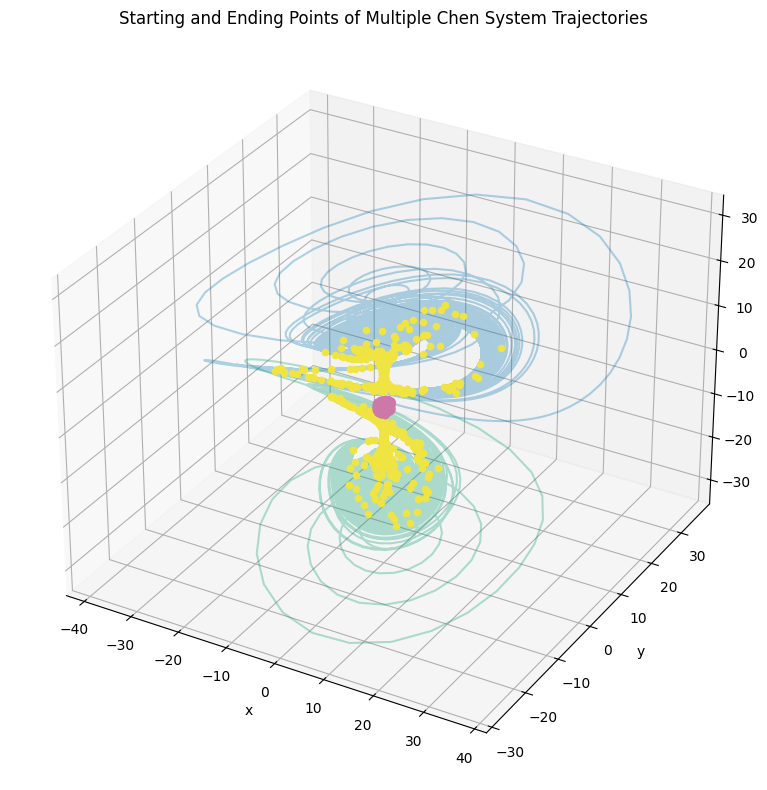

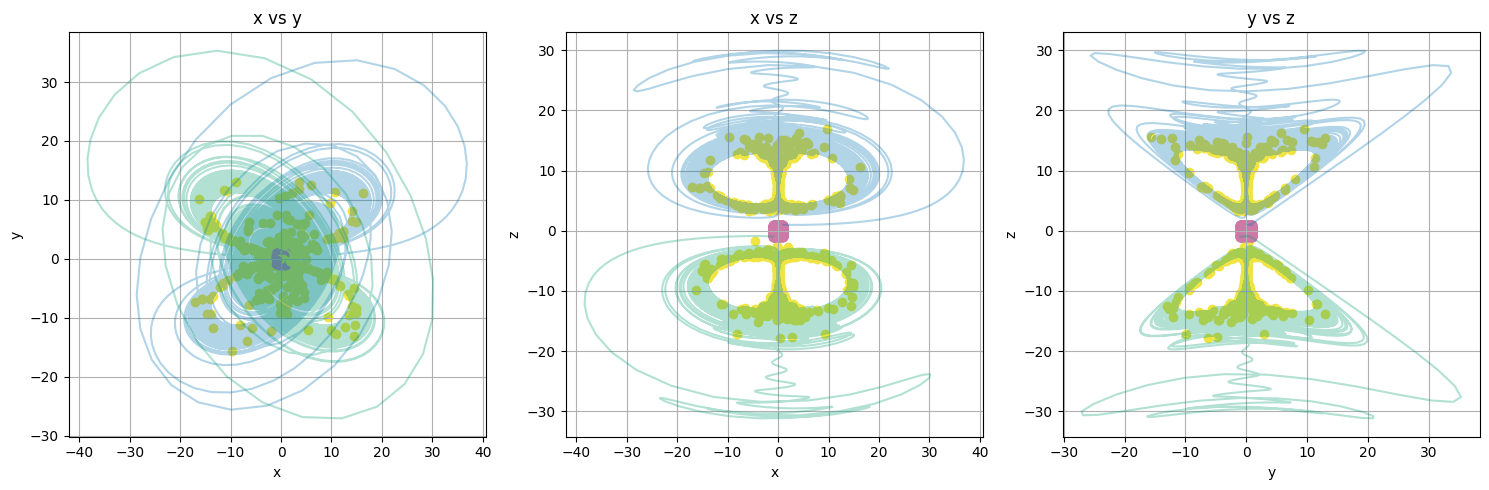

In [41]:
# Plotting the starting and ending points of the trajectories in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the starting points
for start, end in trajectories:
    if end is not None:
        ax.scatter(start[0], start[1], start[2], color='C3')  # Starting points
        ax.scatter(end[0], end[1], end[2], color='C4')  # Ending points
    else:
        # If the trajectory failed to integrate, just plot the starting point
        ax.scatter(start[0], start[1], start[2], color='C3')

# Plot the trajectory for the first initial condition
ax.plot(x1, y1, z1, color='C0', label='Trajectory 1 (Initial: [1.0, 1.0, 1.0])', alpha=0.3)
# Plot the trajectory for the second initial condition
ax.plot(x2, y2, z2, color='C1', label='Trajectory 2 (Initial: [1.01, 1.0, 1.0])', alpha=0.3)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Starting and Ending Points of Multiple Chen System Trajectories')
ax.grid(True)
plt.tight_layout()
plt.show()

# Plotting the starting and ending points of the trajectories in 2D projections
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3, figure=fig)

# First subplot: x vs y
ax1 = fig.add_subplot(gs[0])
for start, end in trajectories:
    if end is not None:
        ax1.scatter(start[0], start[1], color='C3')  # Starting points
        ax1.scatter(end[0], end[1], color='C4')  # Ending points
    else:
        ax1.scatter(start[0], start[1], color='C3')

ax1.plot(x1, y1, color='C0', label='Trajectory 1 (Initial: [1.0, 1.0, 1.0])', alpha=0.3)
ax1.plot(x2, y2, color='C1', label='Trajectory 2 (Initial: [1.01, 1.0, 1.0])', alpha=0.3)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)
ax1.set_title('x vs y')

# Second subplot: x vs z
ax2 = fig.add_subplot(gs[1])
for start, end in trajectories:
    if end is not None:
        ax2.scatter(start[0], start[2], color='C3')  # Starting points
        ax2.scatter(end[0], end[2], color='C4')  # Ending points
    else:
        ax2.scatter(start[0], start[2], color='C3')
        
ax2.plot(x1, z1, color='C0', label='Trajectory 1 (Initial: [1.0, 1.0, 1.0])', alpha=0.3)
ax2.plot(x2, z2, color='C1', label='Trajectory 2 (Initial: [1.01, 1.0, 1.0])', alpha=0.3)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.grid(True)
ax2.set_title('x vs z')

# Third subplot: y vs z
ax3 = fig.add_subplot(gs[2])
for start, end in trajectories:
    if end is not None:
        ax3.scatter(start[1], start[2], color='C3')  # Starting points
        ax3.scatter(end[1], end[2], color='C4')  # Ending points
    else:
        ax3.scatter(start[1], start[2], color='C3')
        
ax3.plot(y1, z1, color='C0', label='Trajectory 1 (Initial: [1.0, 1.0, 1.0])', alpha=0.3)
ax3.plot(y2, z2, color='C1', label='Trajectory 2 (Initial: [1.01, 1.0, 1.0])', alpha=0.3)

ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.grid(True)
ax3.set_title('y vs z')
plt.tight_layout()
plt.show()

## Part 3, Project Check-in 2 (20pt)

This is the second of three check-ins for your final project. Last week, you submitted your first "annual" report. This week, you will submit another report on your progress. This is a chance for you to reflect on your project and to make sure you are on track for the final project.

A second report typically has more details than the first because you have made more progress on your project. You should reflect on the work you have done so far, any challenges you have faced, and any changes you need to make to your project plan. This is also a chance for you to ask for feedback. Notice that the questions remain roughly the same as the first report (this is true in science also).

* 3a (5 pts). Review your project status. What have you been able to accomplish so far? What were you unable to do in the time you had? Be honest in your evaluation of your progress. You will not be penalized for not reaching your milestones. What does that mean you need to prioritize in the coming weeks? (at least 250 words)
* 3b (5 pts). What problems have you encountered in doing you research? What questions came up and how did you resolve them? Are there any unresolved questions? (at least 250 words)
* 3c (5 pts). Provide an **updated** artifact from your project. This could be a plot, a code snippet, a data set, or a figure. Explain what this artifact is and how it fits into your project. (at least 100-200 words)
* 3d (5 pts). Update your project timeline and milestones. How will you adjust your timeline to account for the work you have done and the work you have left to do? (at least 100-200 words)